In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 999

# Import Data

In [41]:
df = pd.read_csv("sudeste.csv")

In [48]:
df.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,2007,11,6,0,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,2007,11,6,1,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,2007,11,6,2,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,2007,11,6,3,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,2007,11,6,4,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


# Table content

wsid - Weather station id  
wsnm - Name station (usually city location or nickname)  
elvt - Elevation  
lat - Latitude  
lon - Longitude  
inme - Station number (INMET number) for the location  
city - City  
prov - State (Province)  
mdct - Observation Datetime (complete date: date + time)  
date - Date of observation  
yr - The year (2000-2016)  
mo - The month (0-12)  
da - The day (0-31)  
hr - The hour (0-23)  
prcp - Amount of precipitation in millimetres (last hour)  
stp - Air pressure for the hour in hPa to tenths (instant)  
smax - Maximum air pressure for the last hour in hPa to tenths  
smin - Minimum air pressure for the last hour in hPa to tenths  
gbrd - Solar radiation KJ/m2  
temp - Air temperature (instant) in celsius degrees  
dewp - Dew point temperature (instant) in celsius degrees  
tmax - Maximum temperature for the last hour in celsius degrees  
dmax - Maximum dew point temperature for the last hour in celsius degrees  
tmin - Minimum temperature for the last hour in celsius degrees  
dmin - Minimum dew point temperature for the last hour in celsius degrees  
hmdy - Relative humid in % (instant)  
hmax - Maximum relative humid temperature for the last hour in %  
hmin - Minimum relative humid temperature for the last hour in %  
wdsp - Wind speed in metres per second  
wdct - Wind direction in radius degrees (0-360)  
gust - Wind gust in metres per second

# Data Exploration

In [45]:
# Provinces
df.prov.value_counts()

MG    4710632
SP    2746440
RJ    1617624
ES     704472
Name: prov, dtype: int64

In [47]:
# Cities
cities = df.city.unique()
cities

array(['São Gonçalo', 'Vitória', 'Santa Teresa', 'Linhares',
       'Alfredo Chaves', 'São Mateus', 'Alegre', 'Presidente Kennedy',
       'Nova Venécia', 'Afonso Cláudio', 'Barbacena', 'Araxá',
       'Montes Claros', 'Uberlândia', 'Almenara', 'Camanducaia', 'Viçosa',
       'Timóteo', 'Ituiutaba', 'Ouro Branco', 'São João del Rei',
       'Varginha', 'Passos', 'Muriaé', 'Juiz de Fora', 'Campina Verde',
       'Conceição das Alagoas', 'Belo Horizonte', 'Serra dos Aimorés',
       'Patrocínio', 'Formiga', 'Sacramento', 'Montalvânia',
       'Teófilo Otoni', 'Três Marias', 'Passa Quatro', 'Caldas',
       'Maria da Fé', 'Governador Valadares', 'Guanhães', 'Aimorés',
       'Florestal', 'Dores do Indaiá', 'Diamantina', 'Curvelo',
       'Porteirinha', 'Mantena', 'Capelinha', 'Unaí', 'Espinosa',
       'Buritis', 'Pirapora', 'Guarda-Mor', 'São Romão', 'Chapada Gaúcha',
       'Águas Vermelhas', 'Itaobim', 'Rio Pardo de Minas', 'Salinas',
       'João Pinheiro', 'Caratinga', 'Ibirité', 'Ma

In [10]:
# Station numbers
station_number = df.inme.unique()
station_number

array(['A333', 'A612', 'A613', 'A614', 'A615', 'A616', 'A617', 'A622',
       'A623', 'A657', 'A502', 'A505', 'A506', 'A507', 'A508', 'A509',
       'A510', 'A511', 'A512', 'A513', 'A514', 'A515', 'A516', 'A517',
       'A518', 'A519', 'A520', 'A521', 'A522', 'A523', 'A524', 'A525',
       'A526', 'A527', 'A528', 'A529', 'A530', 'A531', 'A532', 'A533',
       'A534', 'A535', 'A536', 'A537', 'A538', 'A539', 'A540', 'A541',
       'A542', 'A543', 'A544', 'A545', 'A546', 'A547', 'A548', 'A549',
       'A550', 'A551', 'A552', 'A553', 'A554', 'A555', 'A556', 'A557',
       'A559', 'A560', 'A561', 'A569', 'F501', 'A601', 'A602', 'A603',
       'A604', 'A606', 'A620', 'A608', 'A609', 'A610', 'A611', 'A618',
       'A619', 'A621', 'A624', 'A625', 'A903', 'A652', 'A636', 'A659',
       'A667', 'A701', 'A705', 'A706', 'A707', 'A708', 'A711', 'A712',
       'A713', 'A714', 'A715', 'A716', 'A718', 'A725', 'A726', 'A727',
       'A728', 'A729', 'A733', 'A734', 'A735', 'A736', 'A737', 'A738',
      

In [9]:
# Station ID's
weather_stations = df.wsid.unique()
weather_stations.sort()
weather_stations

array([178, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
       328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
       380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
       393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
       406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420, 421, 422, 423])

**Provinces, cities, and station names are not really very important in this case, since we have the exact geographic coordinates for each weather station, which are given numerically, can be transformed without increasing feature space too much, and are more useful for regression.**

In [49]:
# Look at timestamps
df.mdct.head(20) 

0     2007-11-06 00:00:00
1     2007-11-06 01:00:00
2     2007-11-06 02:00:00
3     2007-11-06 03:00:00
4     2007-11-06 04:00:00
5     2007-11-06 05:00:00
6     2007-11-06 06:00:00
7     2007-11-06 07:00:00
8     2007-11-06 08:00:00
9     2007-11-06 09:00:00
10    2007-11-06 10:00:00
11    2007-11-06 11:00:00
12    2007-11-06 12:00:00
13    2007-11-06 13:00:00
14    2007-11-06 14:00:00
15    2007-11-06 15:00:00
16    2007-11-06 16:00:00
17    2007-11-06 17:00:00
18    2007-11-06 18:00:00
19    2007-11-06 19:00:00
Name: mdct, dtype: object

**Looks like timestamps are given in date and hour format, from which we can extract values like month, day of the week, and hour of the day, which would be useful features for prediction.**

In [50]:
# To look at value distribution, I am going to create a plotting function. Since plotting for very large datasets
# is not supported, I will be sampling the dataset.

def plot_histogram(dataframe, column, name, number_of_bins, sample_size = 1000, input_random_state = 42):
    
    df_sample = dataframe.sample(n = sample_size, random_state = input_random_state)
    df_sample[column].hist(bins = number_of_bins)
    plt.xlabel(name)
    plt.ylabel('Count')

In [51]:
years = df.yr.unique()
years.sort()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

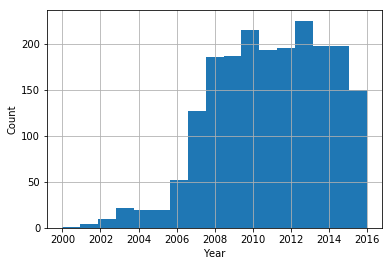

In [52]:
plot_histogram(df, 'yr', 'Year', 17, 2000)

**Clearly, most observations come from 2008-2016.**

In [53]:
df.prcp.describe()

count    1.407984e+06
mean     9.366544e-01
std      2.923291e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.000000e-01
max      1.000000e+02
Name: prcp, dtype: float64

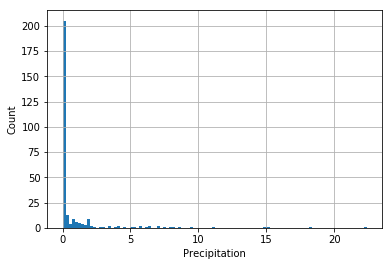

In [56]:
plot_histogram(df, 'prcp', 'Precipitation', 100, 2000)

**A lot of 0 precipitation, let's check values.**

In [58]:
precipitation = df.prcp.unique()
sorted(precipitation)

[nan,
 0.0,
 0.20000000000000001,
 0.40000000000000002,
 0.59999999999999998,
 0.80000000000000004,
 1.0,
 1.2,
 1.3999999999999999,
 1.6000000000000001,
 1.8,
 2.0,
 2.2000000000000002,
 2.3999999999999999,
 2.6000000000000001,
 2.7999999999999998,
 3.0,
 3.2000000000000002,
 3.3999999999999999,
 3.6000000000000001,
 3.7999999999999998,
 4.0,
 4.2000000000000002,
 4.4000000000000004,
 4.5999999999999996,
 4.7999999999999998,
 5.0,
 5.2000000000000002,
 5.4000000000000004,
 5.5999999999999996,
 5.7999999999999998,
 6.0,
 6.2000000000000002,
 6.4000000000000004,
 6.5999999999999996,
 6.7999999999999998,
 7.0,
 7.2000000000000002,
 7.4000000000000004,
 7.5999999999999996,
 7.7999999999999998,
 8.0,
 8.1999999999999993,
 8.4000000000000004,
 8.5999999999999996,
 8.8000000000000007,
 9.0,
 9.1999999999999993,
 9.4000000000000004,
 9.5999999999999996,
 9.8000000000000007,
 10.0,
 10.199999999999999,
 10.4,
 10.6,
 10.800000000000001,
 11.0,
 11.199999999999999,
 11.4,
 11.6,
 11.80000000000

**Although it looks like 'nan', or missing, values are present in the data set, I will come come back to the investigate this lack of precipitation and consult geographic sources to make sure that 0 precipitation makes sense for most hours.**

In [61]:
# Look at elevation
df.elvt.describe()

count    9.779168e+06
mean     5.940923e+02
std      3.980379e+02
min      0.000000e+00
25%      2.830000e+02
50%      5.730000e+02
75%      8.750000e+02
max      1.758000e+03
Name: elvt, dtype: float64

In [67]:
1750/50 #let's bin elevation in 50-meter buckets

35.0

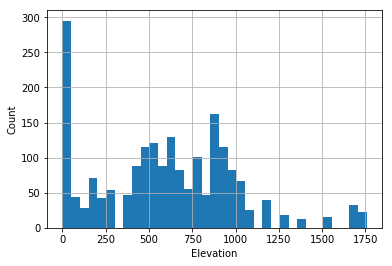

In [70]:
plot_histogram(df, 'elvt', 'Elevation', 35, 2000)

In [71]:
df.lon.describe()

count    9.779168e+06
mean    -4.464590e+01
std      4.882117e+00
min     -5.667732e+01
25%     -4.743410e+01
50%     -4.445378e+01
75%     -4.243575e+01
max      0.000000e+00
Name: lon, dtype: float64

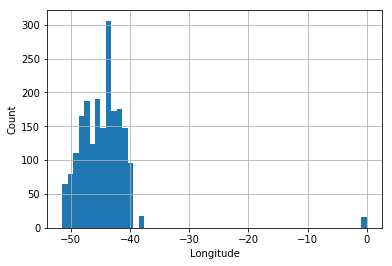

In [72]:
plot_histogram(df, 'lon', 'Longitude', 56, 2000)

**Longitude in Brazil cannot be 0, so we will have to look closer at these values later on.**

In [73]:
df.lat.describe()

count    9.779168e+06
mean    -2.023082e+01
std      3.172643e+00
min     -2.496282e+01
25%     -2.239580e+01
50%     -2.075041e+01
75%     -1.891707e+01
max      0.000000e+00
Name: lat, dtype: float64

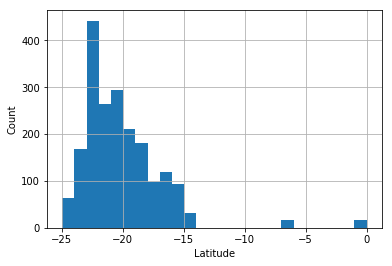

In [74]:
plot_histogram(df, 'lat', 'Latitude', 25, 2000)

**The values for latitude fall under the normal latitude range for Brazil, but we will want to check this sample and examine the outlier values and make sure they correspond to the city/province geographic locations.**

In [75]:
df.stp.describe()

count    9.779168e+06
mean     8.804292e+02
std      2.482650e+02
min      0.000000e+00
25%      9.113000e+02
50%      9.442000e+02
75%      9.731000e+02
max      1.050000e+03
Name: stp, dtype: float64

In [77]:
1050 / 50 #for binning

21.0

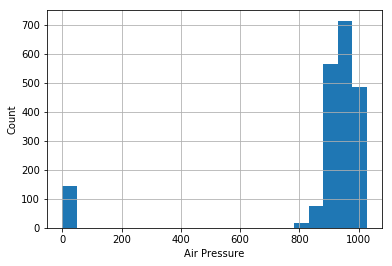

In [78]:
plot_histogram(df, 'stp', 'Air Pressure', 21, 2000)

**Air pressure can't be zero, so we will investigate these values.**

In [79]:
df.gbrd.describe()

count    5.670348e+06
mean     1.176371e+03
std      1.138754e+03
min      0.000000e+00
25%      6.500000e+01
50%      8.634270e+02
75%      2.103000e+03
max      1.158649e+04
Name: gbrd, dtype: float64

In [80]:
1150 / 50 #binning

23.0

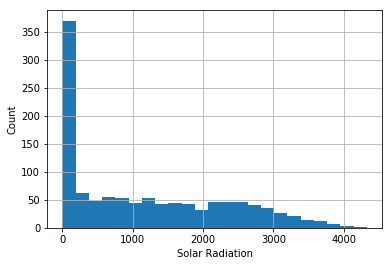

In [81]:
plot_histogram(df, 'gbrd', 'Solar Radiation', 23, 2000)

In [82]:
df.dewp.describe()

count    9.778693e+06
mean     1.472681e+01
std      5.805413e+00
min     -1.000000e+01
25%      1.210000e+01
50%      1.610000e+01
75%      1.890000e+01
max      4.270000e+01
Name: dewp, dtype: float64

In [83]:
43 - (-1) #bin range

44

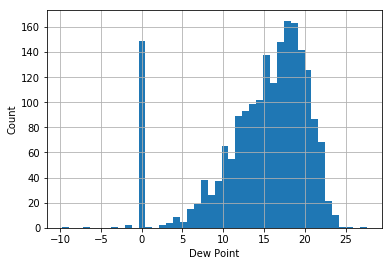

In [87]:
plot_histogram(df, 'dewp', 'Dew Point', 44, 2000)

In [88]:
df.hmdy.describe()

count    9.779168e+06
mean     6.726667e+01
std      2.654213e+01
min      0.000000e+00
25%      5.300000e+01
50%      7.400000e+01
75%      8.900000e+01
max      1.000000e+02
Name: hmdy, dtype: float64

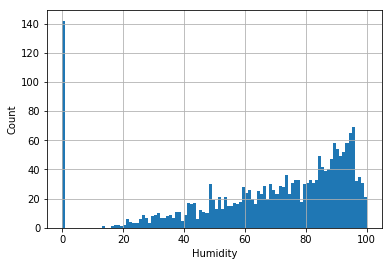

In [89]:
plot_histogram(df, 'hmdy', 'Humidity', 100, 2000)

In [90]:
df.wdsp.describe()

count    8.853607e+06
mean     1.998156e+00
std      1.618531e+00
min      0.000000e+00
25%      8.000000e-01
50%      1.700000e+00
75%      2.900000e+00
max      1.980000e+01
Name: wdsp, dtype: float64

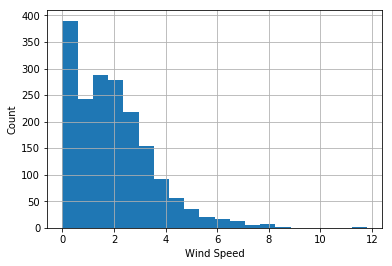

In [94]:
plot_histogram(df, 'wdsp', 'Wind Speed', 20, 2000)

In [95]:
df.gust.describe()

count    9.462694e+06
mean     4.494015e+00
std      2.981790e+00
min      0.000000e+00
25%      2.300000e+00
50%      4.200000e+00
75%      6.300000e+00
max      5.000000e+01
Name: gust, dtype: float64

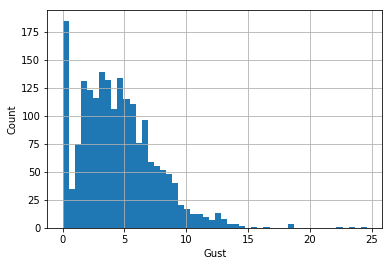

In [98]:
plot_histogram(df, 'gust', 'Gust', 50, 2000)

In [99]:
df.wdct.describe()

count    9.779168e+06
mean     1.385991e+02
std      1.052018e+02
min      0.000000e+00
25%      5.600000e+01
50%      1.140000e+02
75%      2.160000e+02
max      3.600000e+02
Name: wdct, dtype: float64

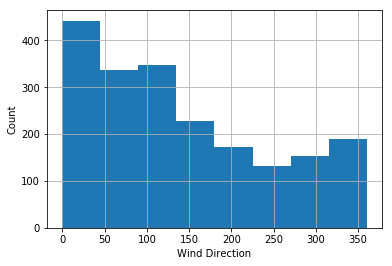

In [101]:
plot_histogram(df, 'wdct', 'Wind Direction', 8, 2000) 
# 8 bins for N, NW, NE, etc. wind directions, since I know it's given in degrees.

**Finally, the target variable is temperature, so let's look at its distribution in the data set.**

In [13]:
df.temp.describe()

count    9.779137e+06
mean     2.047423e+01
std      7.331125e+00
min     -3.800000e+00
25%      1.770000e+01
50%      2.140000e+01
75%      2.490000e+01
max      4.490000e+01
Name: temp, dtype: float64

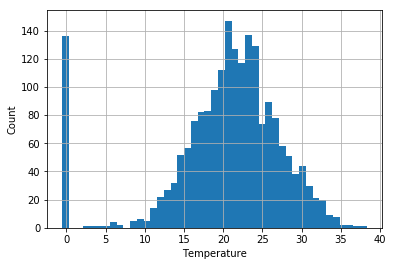

In [60]:
plot_histogram(df, 'temp', 'Temperature', 45, 2000) #45 bins picked because max temperature is 44.9.

In [29]:
df.wdct.describe()

count    9.779168e+06
mean     1.385991e+02
std      1.052018e+02
min      0.000000e+00
25%      5.600000e+01
50%      1.140000e+02
75%      2.160000e+02
max      3.600000e+02
Name: wdct, dtype: float64

**Again, we are seeing a lot of zeros in an otherwise normal distribution. The states we are working with are Rio de Janeiro, San Paulo, Menas Gerais, and Espirito Santo. The states which have 0 degrees Celsius are only Rio Grande de Sul, Parana, and Santa Catarina, so we will have to look at the data to check the zeros.**